Populating the interactive namespace from numpy and matplotlib
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[[0.04705883 0.         0.7137255  0.6862745  0.6313726  0.5803922
  0.54509807 0.5019608  0.4666667  0.44705886 0.43921572 0.427451
  0.40000004 0.3647059  0.3647059  0.34901962 0.34509805 0.29803923
  0.30588236 0.29803923]
 [0.0509804  0.         0.73333335 0.69803923 0.64705884 0.59607846
  0.56078434 0.5176471  0.48235297 0.4666667  0.45882356 0.44705886
  0.42352945 0.38431376 0.38431376 0.3647059  0.36078432 0.31764707
  0.32941177 0.32941177]
 [0.0627451  0.         0.74509805 0.70980394 0.6627451  0.6117647
  0.5764706  0.5372549  0.49803925 0.4901961  0.4784314  0.46274513
  0.4431373  0.40784317 0.40784317 0.38431376 0.37647063 0.34509805
  0.35686275 0.36078432]
 [0.0

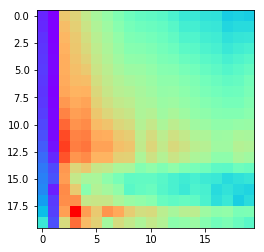

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

%pylab inline

pwd = os.getcwd()
tfrecord_file_path = pwd + "/AE_input.tfrecord"
filename_queue = tf.train.string_input_producer(
                              tf.train.match_filenames_once(tfrecord_file_path),
                              shuffle=True, num_epochs=None)

reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(serialized_example,
                                       features={'data': tf.FixedLenFeature([], tf.string)}) 
img = tf.decode_raw(features['data'], tf.uint8)
img = tf.image.convert_image_dtype(img,tf.float32)
img = tf.reshape(img, [20, 20])
input_batch = tf.train.batch([img],batch_size=10,num_threads=1)

with tf.Session() as sess:   
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    for i in range(1):
        _img = sess.run([img])
        
    plt.imshow(_img[0],cmap=plt.get_cmap('rainbow'))
    print(_img[0])
    
    coord.request_stop()
    coord.join(thread)
    